In [2]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
## Read the table with p-values: branch \t p-val \t transc \t gene
#result_dir = '/Users/osipova/Documents/Py_scripts/absrel/results_absrel_annotations/'
result_dir = '/Users/osipova/Documents/Py_scripts/absrel/results_absrel_toga/'

pval_file_name = 'lowest.lowest.all.genes.pval.table.tsv'
pval_file = glob(result_dir + pval_file_name)[0]
pval_tab = pd.read_csv(pval_file, sep='\t')
pval_tab.head()

,branch,pval,trans,gene
0,HLtaeGut4,1.0,rna-XM_015278218.2,gene-XM_015278216.2
1,HLlicCas1_HLacaPus1,1.0,rna-XM_414763.6,gene-XM_414763.6
2,falPer1_falChe1,1.0,rna-XM_420593.6,gene-XM_420593.6
3,cucCan1,1.0,rna-XM_025152202.1,gene-XM_015289820.2
4,HLparMaj1_HLlicCas1,1.0,rna-XM_419535.6,gene-XM_419535.6


In [4]:
## Define groups of species
nectar_br = ["HLcalAnn5", "HLfloFus1", "HLcalAnn5_HLfloFus1",
                   "HLlicCas1_HLphyNov1", "HLlicCas1", "HLphyNov1",
                   "HLtriMol2", "melUnd1_HLstrHab1"]
nondefined_br = ["HLstrHab1", "melUnd1", "melUnd1_HLtriMol2", "HLzosLat1", "HLlicCas1_HLacaPus1", "HLacaPus1"]

In [6]:
## Dict for genes
pval_thresh = 0.01
# Drop transc column; leave only pvalues above the threshold; group by gene
df = pval_tab.drop('trans', axis=1).loc[pval_tab['pval'] <= pval_thresh].groupby('gene')
gene_dict = dict(tuple(df))
gene_dict

{'gene-NM_001001127.1':            branch          pval                 gene
 73249   HLfloFus1  7.866810e-07  gene-NM_001001127.1
 296295  HLtytAlb2  2.973331e-03  gene-NM_001001127.1
 446116  HLmalCya1  5.134578e-08  gene-NM_001001127.1,
 'gene-NM_001001300.1':          branch          pval                 gene
 517739  halLeu1  4.476295e-08  gene-NM_001001300.1,
 'gene-NM_001001301.1':            branch          pval                 gene
 177097  HLtytAlb2  2.320061e-11  gene-NM_001001301.1,
 'gene-NM_001001304.2':            branch          pval                 gene
 389319  HLmalCya1  9.058587e-12  gene-NM_001001304.2,
 'gene-NM_001001328.2':            branch          pval                 gene
 437658  HLtytAlb2  1.067105e-10  gene-NM_001001328.2,
 'gene-NM_001001530.1':            branch          pval                 gene
 159194  HLmalCya1  0.000000e+00  gene-NM_001001530.1
 502924  HLtytAlb2  1.429967e-13  gene-NM_001001530.1,
 'gene-NM_001001748.2':            branch         

In [20]:
## Make a dict: gene : percent of nectar takers under positive selection
ratio_nectar_dict = {}
for g in gene_dict:
    count_nectar = 0
    count_out = 0
    for branch in list(gene_dict[g].branch):
        if branch in nectar_br:
            count_nectar += 1
        if (branch not in nectar_br ) and (branch not in nondefined_br):
            count_out += 1
    if count_nectar != 0:
        ratio_nectar = count_nectar / (count_nectar + count_out)
        ratio_nectar_dict[g] = ratio_nectar


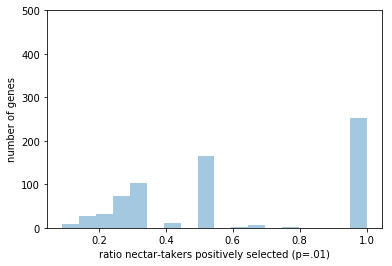

In [14]:
ax = sns.distplot(list(ratio_nectar_dict.values()), bins=18, kde=False)
ax.set_xlabel('ratio nectar-takers positively selected (p=.01)')
ax.set_ylabel('number of genes')
ax.set_ylim(0, 500)

#plt.savefig("anno_0.01_ranked_genes_nectar_ratio.pdf")
#plt.savefig("toga_0.01_ranked_genes_nectar_ratio.pdf")

In [21]:
## Output genes in dictionary that have nectar ratio above threshold
threshold = 0.5
count = 0
out_dir = '/Users/osipova/Documents/Py_scripts/absrel/'

#out_file_name = 'anno.ranked_genes_0.5_nectars.tsv'
#out_file_name = 'anno.ranked_genes_0.5_nectars.tsv'
out_file_name = 'toga_0.01_ranked_genes_0.5_nectars.tsv'
#out_file_name = 'anno_0.01_ranked_genes_0.5_nectars.tsv'

out_file = out_dir + out_file_name

with open(out_file, 'w') as ouf:
    for k, v in sorted(ratio_nectar_dict.items(), key=lambda item: item[1]):
        if (v >= threshold):
            count += 1
            out_line = '{}\t{}\n'.format(k, v)
            ouf.write(out_line)
            #print('{}\t{}'.format(k, v))

print('Number of genes above the {} threshold is: {}'.format(threshold, count))

Number of genes above the 0.5 threshold is: 514


In [1]:
nectar_br = ["HLcalAnn5", "HLfloFus1", "HLcalAnn5_HLfloFus1",
                   "HLlicCas1_HLphyNov1", "HLlicCas1", "HLphyNov1",
                   "HLtriMol2", "melUnd1_HLstrHab1"]
nondefined_br = ["HLstrHab1", "melUnd1", "melUnd1_HLtriMol2", "HLzosLat1", "HLlicCas1_HLacaPus1", "HLacaPus1"]

In [5]:
print('{}'.format('\n'.join(nondefined_br)))

HLstrHab1
melUnd1
melUnd1_HLtriMol2
HLzosLat1
HLlicCas1_HLacaPus1
HLacaPus1
